Tests for OME-TIFF format
====

In [2]:
img = "../data/SB001-T01-01-HE.ome.tiff"

In [2]:
import pyometiff as ome
import tifffile

In [3]:
reader = ome.OMETIFFReader(fpath=img)

In [4]:
try:
    x, meta1, meta2 = reader.read()
except e:
    pass

key not found 'NoneType' object has no attribute 'iter'


In [ ]:
help(reader.read)

In [7]:
tif = tifffile.TiffFile(img)
omexml_string = tif.ome_metadata
print("Pages: {}".format(len(tif.pages)))
print(tif.pages[3].shape)

Pages: 6
(1394, 1749)


In [11]:
tif.series[0].get_shape()

(3, 170180, 88218)

In [12]:
reader.parse_metadata(omexml_string)

key not found 'NoneType' object has no attribute 'iter'


{'Directory': '../data',
 'Filename': 'SB001-T01-01-HE.ome.tiff',
 'Extension': 'ome.tiff',
 'ImageType': 'ometiff',
 'TotalSeries': 2,
 'SizeX': 88218,
 'SizeY': 170180,
 'SizeZ': 1,
 'SizeC': 3,
 'SizeT': 1,
 'SizeS': 1,
 'SizeB': 1,
 'SizeM': 1,
 'PhysicalSizeX': 0.23387573964497,
 'PhysicalSizeXUnit': 'µm',
 'PhysicalSizeY': 0.234330708661417,
 'PhysicalSizeYUnit': 'µm',
 'Sizes BF': [2, 1, 1, 3, 170180, 88218],
 'DimOrder BF': 'XYZCT',
 'DimOrder BF Array': 'TCZYX',
 'ObjMag': '20.0',
 'ObjID': 'Objective:0:0',
 'DetectorModel': 'Hitachi_HV_F22CL',
 'DetectorID': 'Detector:0:0',
 'InstrumentID': 'Instrument:0',
 'Channels': {None: {'ID': 'Channel:0:2', 'SamplesPerPixel': 1}},
 'ImageIDs': [0, 1],
 'AcquisitionDate': '2016-10-25T10:43:32',
 'Name': '20x',
 'DimOrder': 'TCZYX'}

In [13]:
import aicsimageio as iio

In [14]:
reader = iio.readers.ome_tiff_reader.OmeTiffReader(img, parser='lxml')

/home/vlad/miniconda3/envs/cpath/lib/python3.11/site-packages/ome_types/_convenience.py:106: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


In [15]:
reader.metadata.structured_annotations

[MapAnnotation(
    id='Annotation:Resolution:0',
    namespace='openmicroscopy.org/PyramidResolution',
    value=Map(m=[<10 M>]),
 ),
 MapAnnotation(
    id='Annotation:Resolution:1',
    namespace='openmicroscopy.org/PyramidResolution',
    value=Map(m=[<3 M>]),
 ),
 XMLAnnotation(
    id='Annotation:0',
    namespace='openmicroscopy.org/OriginalMetadata',
    value=<Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Value' at 0x7f8570dbe1b0>,
 ),
 XMLAnnotation(
    id='Annotation:1',
    namespace='openmicroscopy.org/OriginalMetadata',
    value=<Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Value' at 0x7f8570ed1210>,
 ),
 XMLAnnotation(
    id='Annotation:2',
    namespace='openmicroscopy.org/OriginalMetadata',
    value=<Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Value' at 0x7f8570ed15d0>,
 ),
 XMLAnnotation(
    id='Annotation:3',
    namespace='openmicroscopy.org/OriginalMetadata',
    value=<Element '{http://www.openmicroscopy.org/Schema

In [ ]:
reader.physical_pixel_sizes

In [ ]:
reader.scenes

In [16]:
help(reader.get_image_data)

Help on method get_image_data in module aicsimageio.readers.reader:

get_image_data(dimension_order_out: Optional[str] = None, **kwargs: Any) -> numpy.ndarray method of aicsimageio.readers.ome_tiff_reader.OmeTiffReader instance
    Read the image as a numpy array then return specific dimension image data.
    
    Parameters
    ----------
    dimension_order_out: Optional[str]
        A string containing the dimension ordering desired for the returned ndarray.
        Default: The natural image dimension order.
    
    kwargs: Any
        * C=1: specifies Channel 1
        * T=3: specifies the fourth index in T
        * D=n: D is Dimension letter and n is the index desired. D should not be
          present in the dimension_order_out.
        * D=[a, b, c]: D is Dimension letter and a, b, c is the list of indices
          desired. D should be present in the dimension_order_out.
        * D=(a, b, c): D is Dimension letter and a, b, c is the tuple of indices
          desired. D sho

In [2]:
import ome_zarr.reader
import ome_zarr.scale
import ome_zarr.utils

In [3]:
img = '/fastdata/tmp/SB001-T01-01-HE.zarr'

In [7]:
img_url = ome_zarr.io.parse_url(img, mode='r')
zr = ome_zarr.reader.Reader(img_url).zarr

In [22]:
zs = ome_zarr.io.parse_url(img, mode='r').store
zr = ome_zarr.reader.Reader(img_url)

In [38]:
list(ome_zarr.reader.OMERO(zr))

TypeError: 'OMERO' object is not iterable

In [45]:
x = zr.zarr.load("0/7").compute()[0,:,0,...]

In [46]:
x.shape

(3, 1329, 689)

In [52]:
import matplotlib.pyplot as plt
import numpy

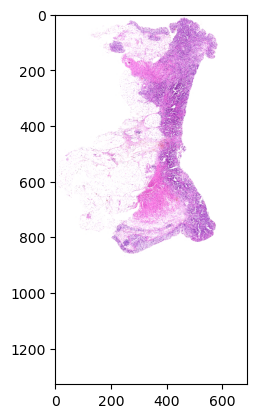

In [56]:
plt.imshow(numpy.swapaxes(numpy.swapaxes(x, 0, 2), 1, 0))

In [57]:
from ome_types import from_xml

In [60]:
ome = from_xml(img + '/OME/METADATA.ome.xml', parser='lxml')

In [62]:
ome.images

[Image(
    id='Image:0',
    name='20x',
    pixels=Pixels(
       id='Pixels:0',
       dimension_order='XYZCT',
       size_c=3,
       size_t=1,
       size_x=88218,
       size_y=170180,
       size_z=1,
       type='uint8',
       big_endian=True,
       channels=[<3 Channels>],
       interleaved=False,
       metadata_only=True,
       physical_size_x=0.23387573964497,
       physical_size_y=0.234330708661417,
       planes=[<3 Planes>],
       significant_bits=8,
    ),
    acquisition_date=datetime.fromisoformat('2016-10-25T10:43:32'),
    description='2EBDF371649E42C39410FAD49F6C6B5F',
    instrument_ref=InstrumentRef(id='Instrument:0'),
    objective_settings=ObjectiveSettings(id='Objective:0:0'),
 ),
 Image(
    id='Image:1',
    name='label image',
    pixels=Pixels(
       id='Pixels:1',
       dimension_order='XYZCT',
       size_c=3,
       size_t=1,
       size_x=1749,
       size_y=1394,
       size_z=1,
       type='uint8',
       big_endian=True,
       channels=[<

In [64]:
ome.dict()

{'binary_only': None,
 'creator': None,
 'datasets': [],
 'experimenter_groups': [],
 'experimenters': [],
 'experiments': [],
 'folders': [],
 'images': [{'id': 'Image:0',
   'pixels': {'dimension_order': <DimensionOrder.XYZCT: 'XYZCT'>,
    'id': 'Pixels:0',
    'size_c': 3,
    'size_t': 1,
    'size_x': 88218,
    'size_y': 170180,
    'size_z': 1,
    'type': <PixelType.UINT8: 'uint8'>,
    'big_endian': True,
    'bin_data': [],
    'channels': [{'id': 'Channel:0:0',
      'acquisition_mode': None,
      'annotation_ref': [],
      'color': Color('white', rgb=(255, 255, 255)),
      'contrast_method': None,
      'detector_settings': None,
      'emission_wavelength': None,
      'emission_wavelength_unit': <UnitsLength.NANOMETER: 'nm'>,
      'excitation_wavelength': None,
      'excitation_wavelength_unit': <UnitsLength.NANOMETER: 'nm'>,
      'filter_set_ref': None,
      'fluor': None,
      'illumination_type': None,
      'light_path': None,
      'light_source_settings': N

In [4]:
import zarr

In [5]:
zr2 = zarr.open('/fastdata/tmp/SB001-T01-01-HE.zarr.zip', mode='r')

In [6]:
zr2.attrs['bioformats2raw.layout']

3

In [7]:
list(zr2.group_keys())

['0', '1', 'OME']

In [8]:
list(zr2['OME'].attrs['series'])

['0', '1']

In [9]:
type(zr2['/0'])

zarr.hierarchy.Group

In [13]:
zr2['0']._ARRAY_DIMENSIONS

AttributeError: 

In [121]:
zr2['/0'].attrs['omero']

{'channels': [{'color': 'FF0000',
   'coefficient': 1,
   'active': True,
   'label': 'Channel 0',
   'window': {'min': 0.0, 'max': 255.0, 'start': 0.0, 'end': 255.0},
   'family': 'linear',
   'inverted': False},
  {'color': '00FF00',
   'coefficient': 1,
   'active': True,
   'label': 'Channel 1',
   'window': {'min': 0.0, 'max': 255.0, 'start': 0.0, 'end': 255.0},
   'family': 'linear',
   'inverted': False},
  {'color': '0000FF',
   'coefficient': 1,
   'active': True,
   'label': 'Channel 2',
   'window': {'min': 0.0, 'max': 255.0, 'start': 0.0, 'end': 255.0},
   'family': 'linear',
   'inverted': False}],
 'rdefs': {'defaultT': 0, 'model': 'color', 'defaultZ': 0}}

In [1]:
zr2['0']['1'].shape

NameError: name 'zr2' is not defined

In [131]:
list(zr2['0'].array_keys())

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [128]:
zr2['0'].attrs['multiscales'][0]

{'metadata': {'method': 'loci.common.image.SimpleImageScaler',
  'version': 'Bio-Formats 6.12.0'},
 'axes': [{'name': 't', 'type': 'time'},
  {'name': 'c', 'type': 'channel'},
  {'name': 'z', 'type': 'space'},
  {'unit': 'micrometer', 'name': 'y', 'type': 'space'},
  {'unit': 'micrometer', 'name': 'x', 'type': 'space'}],
 'name': '20x',
 'datasets': [{'path': '0',
   'coordinateTransformations': [{'scale': [1.0,
      1.0,
      1.0,
      0.234330708661417,
      0.23387573964497],
     'type': 'scale'}]},
  {'path': '1',
   'coordinateTransformations': [{'scale': [1.0,
      1.0,
      1.0,
      0.468661417322834,
      0.46775147928994],
     'type': 'scale'}]},
  {'path': '2',
   'coordinateTransformations': [{'scale': [1.0,
      1.0,
      1.0,
      0.937322834645668,
      0.93550295857988],
     'type': 'scale'}]},
  {'path': '3',
   'coordinateTransformations': [{'scale': [1.0,
      1.0,
      1.0,
      1.874645669291336,
      1.87100591715976],
     'type': 'scale'}]},
 

In [112]:
zr2['0'].attrs['multiscales'][0]['datasets']

[{'path': '0',
  'coordinateTransformations': [{'scale': [1.0,
     1.0,
     1.0,
     0.234330708661417,
     0.23387573964497],
    'type': 'scale'}]},
 {'path': '1',
  'coordinateTransformations': [{'scale': [1.0,
     1.0,
     1.0,
     0.468661417322834,
     0.46775147928994],
    'type': 'scale'}]},
 {'path': '2',
  'coordinateTransformations': [{'scale': [1.0,
     1.0,
     1.0,
     0.937322834645668,
     0.93550295857988],
    'type': 'scale'}]},
 {'path': '3',
  'coordinateTransformations': [{'scale': [1.0,
     1.0,
     1.0,
     1.874645669291336,
     1.87100591715976],
    'type': 'scale'}]},
 {'path': '4',
  'coordinateTransformations': [{'scale': [1.0,
     1.0,
     1.0,
     3.749291338582672,
     3.74201183431952],
    'type': 'scale'}]},
 {'path': '5',
  'coordinateTransformations': [{'scale': [1.0,
     1.0,
     1.0,
     7.498582677165344,
     7.48402366863904],
    'type': 'scale'}]},
 {'path': '6',
  'coordinateTransformations': [{'scale': [1.0,
     1.

In [91]:
import re

In [107]:
float(re.split("x", "2.0x")[0])

2.0

In [95]:
help(re.match)

Help on function match in module re:

match(pattern, string, flags=0)
    Try to apply the pattern at the start of the string, returning
    a Match object, or None if no match was found.



In [109]:
round(0.468661417322834/0.234330708661417)

2

In [120]:
help(round)

Help on built-in function round in module builtins:

round(number, ndigits=None)
    Round a number to a given precision in decimal digits.
    
    The return value is an integer if ndigits is omitted or None.  Otherwise
    the return value has the same type as the number.  ndigits may be negative.

